In [17]:
! pip install pandas
! pip install numpy
! pip install scipy
! pip install seaborn
! pip install matplotlib
! pip install statsmodels

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 3: Load in the Dataset in your Jupyter Notebook

In [19]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df
boston_df.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 4: Generate Descriptive Statistics and Visualizations

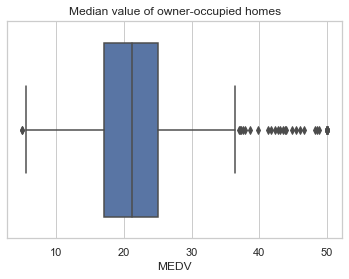

In [20]:
sns.set(style="whitegrid")
sns.boxplot(x=boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.show()

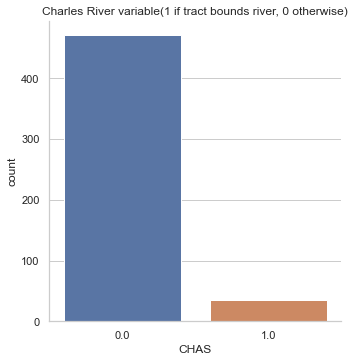

In [21]:
sns.set(style="whitegrid")
sns.catplot(x='CHAS',kind='count',data=boston_df)
plt.title('Charles River variable(1 if tract bounds river, 0 otherwise)')
plt.show()

In [22]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


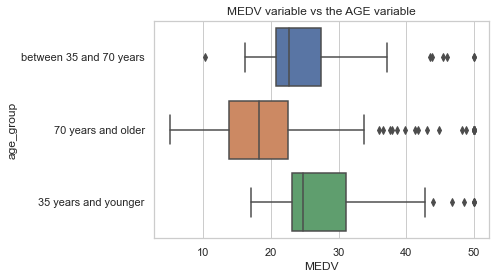

In [23]:
sns.set(style='whitegrid')
sns.boxplot(x='MEDV',y='age_group',data=boston_df)
plt.title('MEDV variable vs the AGE variable')
plt.show()

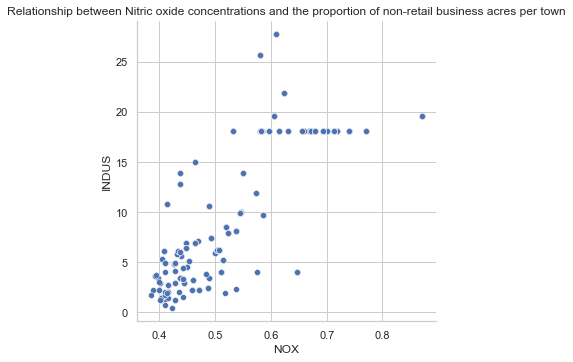

In [24]:
sns.relplot(x='NOX',y='INDUS',data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()


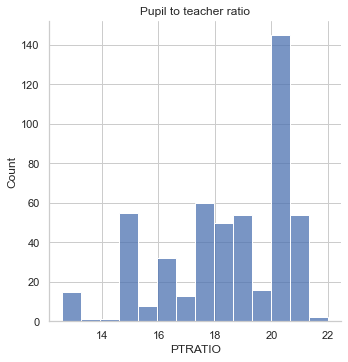

In [25]:
sns.displot(x='PTRATIO',data=boston_df)
plt.title('Pupil to teacher ratio')
plt.show()

## Task 5
Is there a significant difference in median value of houses bounded by the Charles river or not?
Hypothesis:

𝐻_0:µ_1=µ_2
  (there is no difference in median value of houses bounded by the Charles river )
𝐻_1:µ_1≠µ_2
  (there is significant difference in median value of houses bounded by the Charles river )
α = 0.05

In [26]:
medv_avg=boston_df.groupby('CHAS').agg({'MEDV':['mean','std']})
medv_avg

MEDV           
           mean        std
CHAS                      
0.0   22.093843   8.831362
1.0   28.440000  11.816643

In [27]:
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],center='mean')


LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=False)


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

## Conclusion:

Since the pvalue is less than 0.05, we reject the null hypothesis H_0, i.e. there is significant difference in median value of houses bounded by the Charles river

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
Hypothesis:

𝐻_0:µ_1=µ_2=µ_3
  (there is no difference in median values of houses for each proportion of owner occupied units built prior to 1940)
𝐻_1:
  At least one of these three means differ
α = 0.05

In [29]:
scipy.stats.levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],boston_df[boston_df['age_group']=='70 years and older']['MEDV'],center='mean')


LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [30]:
scipy.stats.f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],boston_df[boston_df['age_group']=='70 years and older']['MEDV'])


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

## Conclusion:

Since the pvalue is less than 0.05, we reject the null hypothesis H_0, i.e. there is significant difference in median values of houses for each proportion of owner occupied units built prior to 1940

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
Hypothesis:

𝐻_0:
  there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

𝐻_1:
  there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

α = 0.05



In [31]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])


(0.763651446920915, 7.913361061239593e-98)

## Conclusion:

Since the pvalue is less than 0.05, we reject the null hypothesis H_0, i.e. there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town, and the correlation is strong and positive

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
Hypothesis:

𝐻_0:
  an additional weighted distance to the five Boston employment centres does not influence the median value of owner occupied homes

𝐻_1:
  an additional weighted distance to the five Boston employment centres influences the median value of owner occupied homes

α = 0.05

In [32]:
x=boston_df['DIS']
y=boston_df['MEDV']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

/Users/liyangyang/Documents/program/anaconda3/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        15:40:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
Conclusion:

Since the pvalue is less than 0.05, we reject the null hypothesis H_0, i.e. an additional weighted distance to the five Boston employment centres (DIS) influences the median value of owner occupied homes (MEDV), the corresponding coefficient 1.0916 indicates the mean increase of MEDV for every additional DIS